In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Kepplerjev problem

<img src="imgs/solarSystem.png" style="width:600px; margin:0px;">

**Enačba gibanja**

$ m \,\mathbf{a} = \mathbf{F_g} = - G \frac{m M}{r^2} \frac{\mathbf{r}}{r}$

In [2]:
k = 1 # G*M

# Začetni pogoji:
t = [0] # [s]
r = [[1, 0]] # začetna lega
v = [[0, .4]] # začetna hitrost

# Račun s končnimi diferencami:
t_final = 5
N = 1000000

dt = t_final/N # velikost časovnega koraka [s]
print(f'dt = {dt}')

def distance(p1,p2):
    """ Izračuna razdaljo med točkama p1 in p2 """
    
    return np.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )

def iterationStep(t1, r1, v1, dt):
    """ Naredi korak iteracije """
    
    x1, y1 = r1
    vx1, vy1 = v1
    
    R = distance([0,0], r1)
    a = [-k*x1/R**3, -k*y1/R**3]
    
    vx2, vy2 = vx1 + a[0]*dt, vy1 + a[1]*dt
    x2, y2 = x1 + vx1*dt, y1 + vy1*dt
    
    return t1+dt, [x2, y2], [vx2, vy2]

for i in range(N):
    
    iterationStep
    
    t2, r2, v2 = iterationStep(t[-1], r[-1], v[-1], dt)

    t.append(t2)
    r.append(r2)
    v.append(v2)

r = np.array(r)
v = np.array(v)


dt = 5e-06


(-0.14176367374566184,
 1.062142347169399,
 -0.3261189760950101,
 0.3253084539082648)

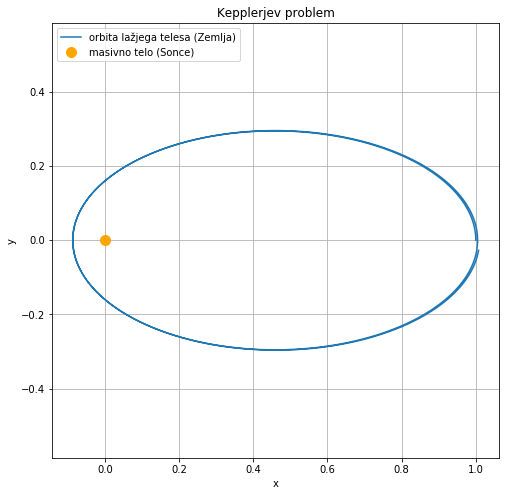

In [3]:
# Opazuj vezane in nevezane orbite

plt.figure(figsize=(8,8))

plt.plot(r[:,0], r[:,1], label='orbita lažjega telesa (Zemlja)')
plt.plot(0,0, '.', color='orange', ms=20, label='masivno telo (Sonce)')
plt.legend(loc='upper left')

plt.title('Kepplerjev problem')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.axis('equal')

## Klasični model vodikovega iona $H_2^+$

Obravnavajmo problem treh teles, pri čemer bomo predpostavili, da sta protona $p$ nepremična, elektron $e$ pa se giblje v njunem potencialu.

<img src="imgs/hydrogenIon.png" style="width:200px; margin:0px;">

$$F_j = - \frac{e_0^2}{4\pi\epsilon_0 r_j^2} \frac{\mathbf{r}_j}{r_j},\qquad j=1,2$$

$\mathbf{F}_j$ ... elektrostatična sila $j$-tega protona $p$ na elektron $e$<br>
$\mathbf{r}_j$ ... vektor od lege $j$-tega protona $p$ do lege elektrona $e$

Poskusi najti kakšno zanimivo orbito, npr. podobno tisti, ki si jo videl/a na [spletni strani](http://zimskasola.fmf.uni-lj.si/#delavnice).